# Variational auto Encoder

## Car dataset

### loading cuda model, converting into cpu and using it for car image generation


In [1]:
# mount gdrive
mount_drive = True
if mount_drive:
    from google.colab import drive
    drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [2]:
import os
os.chdir('/content/gdrive/My Drive/TSAI/EVA4_Phase2/session7-VAE/notebooks/')
print(os.getcwd())

/content/gdrive/My Drive/TSAI/EVA4_Phase2/session7-VAE/notebooks


In [3]:
# Import standard packages
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# To autoreload all te custom files when modified
import autoreload
%load_ext autoreload
%autoreload

In [10]:
from pathlib import Path

# important folders used in this application

SOLUTION_LOG_DIR = f"logs/logs_vae"   
MODEL_BASEPATH = Path(f'./{SOLUTION_LOG_DIR}/saved_models') 

In [12]:
from models.vae_net import ResidualBlock, Decoder

model_path = f'{MODEL_BASEPATH}/vae_decoder_cuda.pt'
d_model = torch.load(model_path, map_location=torch.device('cpu'))
d_model = d_model.to('cpu')

In [13]:
get_model_size = lambda filename: os.path.getsize(filename)/1e6

In [14]:
print(f'Pytorch model size (MB): {get_model_size(model_path):0.2f}')

Pytorch model size (MB): 45.37


In [22]:
def get_sample_image(decoder, latent_dims, n_samples=25):
    n_rows = int(np.sqrt(n_samples))
    sample = torch.randn(n_samples, latent_dims)
    sample = decoder(sample)#.cpu()
    sample = torch.cat([torch.cat([sample[n_rows*j+i] for i in range(n_rows)], dim=1) for j in range(n_rows)], dim=2)
    sample = np.transpose(sample.detach().numpy(),[1,2,0])
    sample = sample.astype(np.float)
    return np.clip(sample,0,1)

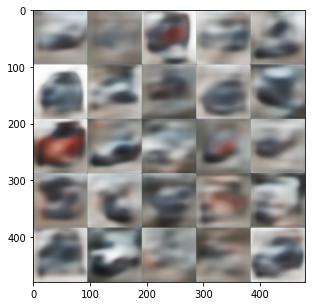

In [29]:
d_model.eval()
fake_images = get_sample_image(d_model, latent_dims=128, n_samples=25)

fig = plt.figure(figsize=(5, 5))
plt.imshow(fake_images)

## Converting image to Base64 for transferring over the Network for Rendering on HTML

In [24]:
from PIL import Image
import io
import base64

def img_to_base64(img):
    img = Image.fromarray(img, 'RGB') 
    buffer = io.BytesIO()
    img.save(buffer,format="JPEG")
    myimage = buffer.getvalue()                     
    img_str = f"data:image/jpeg;base64,{base64.b64encode(myimage).decode()}"
    return img_str

''
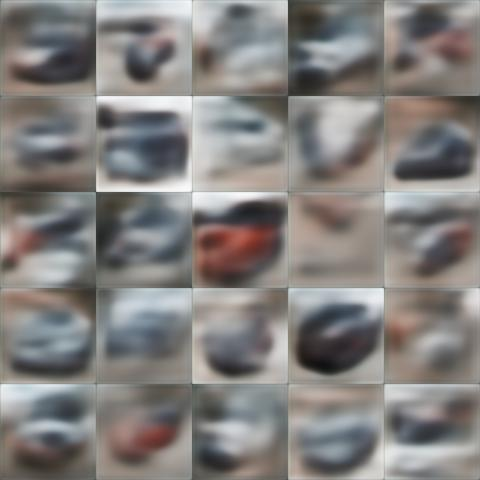

In [25]:
fake_images_norm = np.uint8(fake_images*255)
img_str = img_to_base64(fake_images_norm)
img_str

In [26]:
# How to use base64 encoded images?
img_bytes = base64.b64decode(img_str.split(',')[1])
img = Image.open(io.BytesIO(img_bytes))
img = np.array(img)

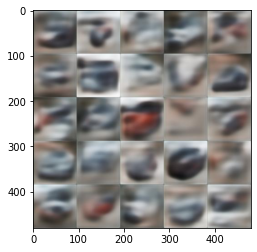

In [27]:
plt.imshow(img)